# Извлечение информации о котировках из сообщений

In [1]:
import os
import re
import pathlib
import numpy as np
import pandas as pd

In [2]:
# constants
PATH_MSG = '/data/files/fxcash/'

In [3]:
# data load
# TODO: SQL from CH
df_all = pd.DataFrame()
for csv in os.listdir(PATH_MSG):
    df_all = df_all.append(pd.read_csv(PATH_MSG + csv))# Data_load.ipynb

In [4]:
df_all.tail()

,Unnamed: 0,message_id,dt,text,sender_id,source
15204,15204,25,2021-02-18 17:41:13,NaN,3.806110e+08,obmenvmsk
15205,15205,23,2021-02-18 17:22:55,NaN,6.644388e+08,obmenvmsk
15206,15206,17,2021-02-18 16:52:22,NaN,1.024115e+09,obmenvmsk
15207,15207,16,2021-02-18 16:52:09,NaN,3.343576e+08,obmenvmsk
15208,15208,1,2021-02-17 08:18:06,NaN,NaN,obmenvmsk


In [5]:
# select source and do some wrangling
SRC = 'obmenvmsk'
df = df_all.loc[df_all['source']==SRC]
df = df.replace(np.nan, '', regex=True)
df['dt'] = df['dt'].astype('datetime64[ns]')
df = df.sort_values(by='message_id')
df.text = df.text.str.lower()
print(df.dt.max())

2022-04-08 19:08:50


In [737]:
# 2022-04-08
patterns = [
            r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим)|куп(им|лю|)|кто(.*?)прод|взял бы|возьм|бер)',
            r'(дол|usd|doll|\$|🇺🇸|💵|💲|💰|🤑|💸)',
r'((\d+(| |  )(р|руб|₽))|((курс(|у)|стоимость)( |  )\d+)|(цен(а|е)(.*?)\d+)|((дол|usd|doll|\$|🇺🇸|💵|💲|💰|🤑|💸|долл(.|ар|))(по|-|=)(| |  )\d+)|((по|за|доллар)(| |  )\d+))'
            ]

In [739]:
usd_text = '(дол(л|.|лар(|ы|ов))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)'

In [741]:
# USD patterns
a0 = f'(((?<!можно)(?<!купюрами)(?<!купюры)(?<!купуюры)(?<!номинал))\sпо[\s,\-=:](| |  )\d+(| |  )(р|₽|(.*){usd_text}))' # по 80 р, по 80 за доллар
a1 = '((дол(л|.|ар|лар(|ы))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)(|\s)([\s=:\-]\d+[.,]|(|\s)(\D)(по|)(|[\-=:])(| |  )(|~)\d+(| |  )(р|руб|₽)))(?!((.*)курс)|(.*)по)' # $-110 
a2 = f'((курс(|у)|цен(а|е)|стоимост(|и))(|[\-=:])(| |  )\d+(?!((|\s)(к|:)(|\s)1)))' # курс 80
a3 = f'((?!({usd_text}(.*)\d+(.*)))\s(курс(|у)|цен(а|е)|стоимост(|и)|по|не дороже)(|[,\-=:])\s\d+(?!(.*)(за шт)|((.*){usd_text}|((|\s)(к|:)(|\s)1))))' # $ХХХ по __ (рублей) 
a4 = f'(((?<!можно)(?<!купюрами)(?<!купюры)(?<!купуюры)(?<!номинал))\d+(р|руб|₽)(.*)(за|=)(|\s)(|1)(|\s){usd_text})' #  200 рублей за 1$.
#a5 = f'((?!({usd_text}(.*)\d+(.*)))\s(курс(|у)|цен(а|е)|стоимост(|и)|по|не дороже)(|[,-=:])\s\d+(?!((|\s)(к|:)(|\s)1)))' # $ХХХ по __ (рублей) 
#a4 = f'((?!(\d+(.*){usd_text}))\s(курс(|у)|цен(а|е)|стоимост(|и)|по|за|)(|,|-|=|:)\d+)' # ХХХ$ по __ (рублей) 
#a4_ = f'((?!\d+(.*?){usd_text}(.*?)){usd_text}(.*?)(по|за|на|)(|-|=|:)(| |  )\d+)' # ХХХ$ по __ (рублей) 

a_magic= '((?!(.*?)сегодня(.*?))\d+(?!(.*?)({usd_text}|по|за|на|курс|цен|стоимост)))' # - фильтрация чтобы попали верхние варианты

a_list = [a0,a1,a2,a3,a4]
a_list_str = '|'.join(a_list)
patterns_usd = fr'{a_list_str}'

In [742]:
print(a1)

((дол(л|.|ар|лар(|ы))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)(|\s)([\s=:\-]\d+[.,]|(|\s)(\D)(по|)(|[\-=:])(| |  )(|~)\d+(| |  )(р|руб|₽)))(?!((.*)курс)|(.*)по)


In [743]:
list(df_usd_extract_[df_usd_extract_['rate'].astype('int')>300].text)

['летом доллар будет по 500, поэтому это будет фиаско']

In [744]:
for p in a_list:
    print(re.findall(p,'куплю евро 4000€по 99р долар по 4000 по 89р наличка москва нахожусь на юге. можно могу выехать на север'))

[(' по 89р', '', '', '', 'р', '', '', '', '', '')]
[]
[]
[(' по 4000', '', '', '', '', '', '', '', 'по', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''), (' по 89', '', '', '', '', '', '', '', 'по', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '')]
[]


In [745]:
print(a1)

((дол(л|.|ар|лар(|ы))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)(|\s)([\s=:\-]\d+[.,]|(|\s)(\D)(по|)(|[\-=:])(| |  )(|~)\d+(| |  )(р|руб|₽)))(?!((.*)курс)|(.*)по)


In [746]:
test_cases = '''
 $3000 по 100
  $10 000 по 120
  $4000 спб по 89
  $600, 110, 
  $500 по 120	
  $ 5000 по 117	
   доллар 4000. курс 88
   доллары куплю 3500. курс 95.москва
'''

test_cases_list = test_cases.split('\n')

In [747]:
test_cases = '''
   10к$-120
 2000$ - 110₽
 '''
test_cases_list = test_cases.split('\n')

In [748]:
test_cases = '''
продам $5000 по курсу 115₽
нижний новгород. продам $ 500 по 110
500 мск, 125р.	
$ 3000, спб, по 91₽.
продам $500 по 120
$ 2000 - 110₽
$ 500 по 110
доллар 4000. курс 88 
'''
test_cases = '''
продам доллар 130 \nевро 145 
:usd американский доллар-150
🇺🇸-по 150
💰по 91. 
доллар-150 рублей
93 р. от 1000$.
 usa 🇺🇸-по 150
 2000$ -98₽ 
 продам. $110. €120
 125руб-$1 
'''
test_cases_list = test_cases.split('\n')

q = '''
1500-1600$ москва. по 110р з
15000\nкурс 92
\n4400$ по 98₽	
 1000 уе\n💵 по 90\
\n\n50000 $ по 100

доллар 1700
куплю 3000$ москва п\
обменяю рубли 86=1 $,

$ на 300.000 руб
дам 1200$ , 1000€ (1000$ есть 
куплю $ 70к, в
есть 1500$ в москве за с
http://
€ на $ 1 к 1.1 
5к$ 
100$ купуюры по 11000 
куплю нал $/€\nмосква \nинтересует 1000$/3000€
'''

In [749]:
test_cases ='''

доллары 5000 продам
москва, серпухов продам $500 предложение к
'''
test_cases_list = test_cases.split('\n')

In [750]:
print(a_list[3])

((?!((дол(л|.|ар|лар(|ы|ов))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)(.*)\d+(.*)))\s(курс(|у)|цен(а|е)|стоимост(|и)|по|не дороже)(|[,\-=:])\s\d+(?!(.*)(за шт)|((.*)(дол(л|.|ар|лар(|ы|ов))|usd|doll(|ar)|\$|🇺🇸|💵|💲|💰|🤑|💸)|((|\s)(к|:)(|\s)1))))


In [751]:
'''
 $3000 по 100
   10к$-120
 2000$ - 110₽
  $10 000 по 120
  $4000 спб по 89
  $600, 110, 
  $500 по 120	
  $ 5000 по 117	

 доллар-120 рублей
  екатеринбург$ 130	
   доллар-150
    продам доллар 130
  $-110 
    по курсу не дороже 89
    $ 95 и € 110

продам 5000$, 10000$ по 110, 
    доллары 3290(купюры: 2000 
'''

'\n $3000 по 100\n   10к$-120\n 2000$ - 110₽\n  $10 000 по 120\n  $4000 спб по 89\n  $600, 110, \n  $500 по 120\t\n  $ 5000 по 117\t\n\n доллар-120 рублей\n  екатеринбург$ 130\t\n   доллар-150\n    продам доллар 130\n  $-110 \n    по курсу не дороже 89\n    $ 95 и € 110\n\nпродам 5000$, 10000$ по 110, \n    доллары 3290(купюры: 2000 \n'

In [752]:
# 2022-04-12
df_ = df.copy()#.iloc[-1000:]
texts = list(df_.text)
dates = list(df_.dt)

patterns_last = [
            r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим)|мен|куп(им|ить|лю)|кто(.*?)прод|(взят|возьм))',
            fr'{usd_text}',
            patterns_usd
            ]

usd_extract = []
for i,text in enumerate(texts):
    match_list = [re.search(patt, text) for patt in patterns_last]
    el = [dates[i],text]
    for el_match in match_list:
        el_match_gr = (el_match.group() if el_match is not None else None)
        el.append(el_match_gr)
    
    el_match_num = re.search(r'(\d+)', el[-1]).group() if el[-1] is not None else None
    el.append(el_match_num)

    num_list = [float(e) for e in re.findall(r'(\d+)',text)]
    el.append(num_list if len(num_list)>0 else -1)

    usd_extract.append(el)

In [753]:
df_usd_extract = pd.DataFrame(usd_extract)
df_usd_extract.columns = ['dt','text','trans_type', 'currency','value_string','rate', 'value_list']

df_usd_extract = df_usd_extract[df_usd_extract['value_list']!=-1]

df_sample = df_usd_extract[~df_usd_extract.currency.isna()].sample(30).copy()
#df_sample = df_usd_extract[~df_usd_extract.currency.isna()].loc[[4365]]

#print(list(df_sample.text))
df_sample.iloc[:,1:]


,text,trans_type,currency,value_string,rate,value_list
10992,продам доллар по 89,продам,долл,по 89,89,[89.0]
6565,продам usd с карты тинькофф за наличные рубли ...,продам,usd,по 108,108,[108.0]
14574,продажа $\nдо 10.000$ курс 92₽ за $\nот 10.000...,продажа,$,курс 92,92,"[10.0, 0.0, 92.0, 10.0, 0.0, 91.0, 5.0, 1.0, 0..."
13169,продам новые 700$ по 91 северо запад...,продам,$,по 91,91,"[700.0, 91.0]"
7019,"продам $ от 3 тыс. у.е. по 111,5\n, от 10 тыс ...",продам,$,по 111,111,"[3.0, 111.0, 5.0, 10.0, 111.0]"
3409,продам 17000$ по 133₽,продам,$,$ по 133₽,133,"[17000.0, 133.0]"
14035,продам $ 6300 (93) \nпродам €10000 (105)\nесли...,продам,$,None,None,"[6300.0, 93.0, 10000.0, 105.0]"
11689,куплю usdt dogecone +2%,куплю,usd,None,None,[2.0]
6295,куплю $ по 105₽,куплю,$,$ по 105₽,105,[105.0]
10851,"куплю usdt tethor до 500 000, можно и больше\n...",куплю,usd,None,None,"[500.0, 0.0]"


In [754]:
df_usd_extract_ = df_usd_extract[(~df_usd_extract['rate'].isna())&(~df_usd_extract['currency'].isna())].copy()


In [755]:
list(df_usd_extract_[df_usd_extract_['rate'].astype('int')<30].text)

['127 либо если переводом на долларовый счёт то по 1.05',
 'продам usdt за рубли +7%\nкурс 1$ - 140',
 'куплю евро и доллары в центре мск  или спб по 10 тысяч, пишите в личку.',
 'москва куплю $ 20.000+ за нал 118 можно частями',
 'а зачем 30, помню время по 6р/$',
 'dogecoin куплю по 0.08$',
 'куплю по 0.10 за $',
 'продам usd 1,500 нал',
 'просто все,кто имел,сняли по 10.000$ скоро все иродадут тогда узнаем курс,через месяц',
 'dogecoin куплю по 0.11$ на карту сбера',
 'они по 0.147 usdt',
 'куплю dogecone по 0.14$',
 'куплю наличные белорусские рубли  за российские ₽ переводом сбер/тиньков по 3.15\nкуплю $ за ₽ по 88 - 2500$',
 'продам доллары 10.000 номиналом 100 за 90 рублей\nи 6.000 евро номиналом 500,100,50 по 100 рублей\nв москве, проверка в банке. \nпредложение в личку',
 'да,и на этот цирк уже 4о миллиардов $ потрачено из резервов.завтра будет курс 1рубль за доллар-и все станем долларовыми миллионерами.',
 'usdt продам за нал по 4%',
 'есть по 2 доллара',
 'куплю 100 банкнот 

In [756]:
text = '''
доллар 1700
куплю 3000$ москва п\
продам $5000 по курсу 115₽
обменяю рубли 86=1 $,
нижний новгород. продам $ 500 по 110
500 мск, 125р.	
15000\nкурс 92
1500-1600$ москва. по 110р з

$ 2000 - 110₽
дам 1200$ , 1000€ (1000$ есть 
куплю $ 70к, в
есть 1500$ в москве за с

куплю нал $/€\nмосква \nинтересует 1000$/3000€
http://
продам $500 по 120
€ на $ 1 к 1.1 
$ 3000, спб, по 91₽.
5к$ 

$ 500 по 110
100$ купуюры по 11000 
\n4400$ по 98₽	
доллар 4000. курс 88 
$ на 300.000 руб
 1000 уе\n💵 по 90\
\n\n50000 $ по 100
'''

In [757]:
доллар 1700
куплю 3000$ москва п\
продам $5000 по курсу 115₽
обменяю рубли 86=1 $,
нижний новгород. продам $ 500 по 110
500 мск, 125р.	
15000\nкурс 92
1500-1600$ москва. по 110р з

$ 2000 - 110₽
дам 1200$ , 1000€ (1000$ есть 
куплю $ 70к, в
есть 1500$ в москве за с

куплю нал $/€\nмосква \nинтересует 1000$/3000€
http://
продам $500 по 120
€ на $ 1 к 1.1 
$ 3000, спб, по 91₽.
5к$ 

$ 500 по 110
100$ купуюры по 11000 
\n4400$ по 98₽	

SyntaxError: invalid syntax (1339430872.py, line 1)

In [ ]:
'''
доллары куплю 3500. курс 95.москва
доллары 5000 продам
москва, серпухов продам $500 предложение к
'''


In [ ]:
5429,4594,8850

(5429, 4594, 8850)

In [759]:
df_usd_extract.rate = df_usd_extract.rate.astype('float')

In [725]:
df_usd_extract['value_list'] = df_usd_extract['value_list'].apply(
    lambda x: list(filter(lambda i: (i <200)& (i>50) ,x)) )

In [726]:
df_usd_extract['rate_list'] = df_usd_extract['value_list'].apply(lambda x: min(x) if len(x)>0 else None)

In [727]:
value_list

NameError: name 'value_list' is not defined

In [ ]:
df_usd_extract.sample(20)

,dt,text,trans_type,currency,value_string,rate,value_list,rate_list
8778,2022-04-07 06:59:39,продам доллары 110 много!,продам,дол,110,110.0,[110.0],110.0
2347,2022-03-25 13:54:49,продам $ в мск 105,продам,$,105,105.0,[105.0],105.0
8136,2022-04-06 09:02:18,"куплю💲 уфа, 85",куплю,💲,85,85.0,[85.0],85.0
7590,2022-04-05 11:18:00,"куплю 1400 евро, по 100р",куплю,None,по 100р,100.0,[100.0],100.0
822,2022-03-17 10:35:11,екатеринбург продам 3500$ по 120,продам,$,$ по 120,120.0,[120.0],120.0
6079,2022-04-01 00:19:18,куплю доллар $ по 85 ₽ а лс,куплю,дол,$ по 85 ₽,85.0,[85.0],85.0
9253,2022-04-07 19:02:02,куплю доллары по 83 краснодар,куплю,дол,доллары по 83,83.0,[83.0],83.0
8196,2022-04-06 10:12:18,куплю 1000$ по 88 москва,куплю,$,$ по 88,88.0,[88.0],88.0
5607,2022-03-31 14:29:22,продам доллары (100)\nлюбые проверки \nвозможн...,продам,дол,100,100.0,[100.0],100.0
9324,2022-04-07 21:12:24,"продам 1500$, новые образцы, москва",продам,$,None,NaN,[],NaN


In [ ]:
df_usd_extract.dropna()[
    (df_usd_extract['rate_list']>80) & (df_usd_extract['currency']!=None)
    & (~df_usd_extract['trans_type'].isin(['купл','кто прод']))
    ][['dt','rate_list']].set_index('dt').resample('4h').median().plot(figsize=(15,7))

df_usd_extract.dropna()[
    (df_usd_extract['rate_list']>80) & (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type'].isin(['купл','кто прод']))
    ][['dt','rate_list']].set_index('dt').resample('4h').median().plot(figsize=(15,7))

KeyError: 'rate_list'

In [762]:
df_ask

NameError: name 'df_ask' is not defined

<AxesSubplot:xlabel='dt'>

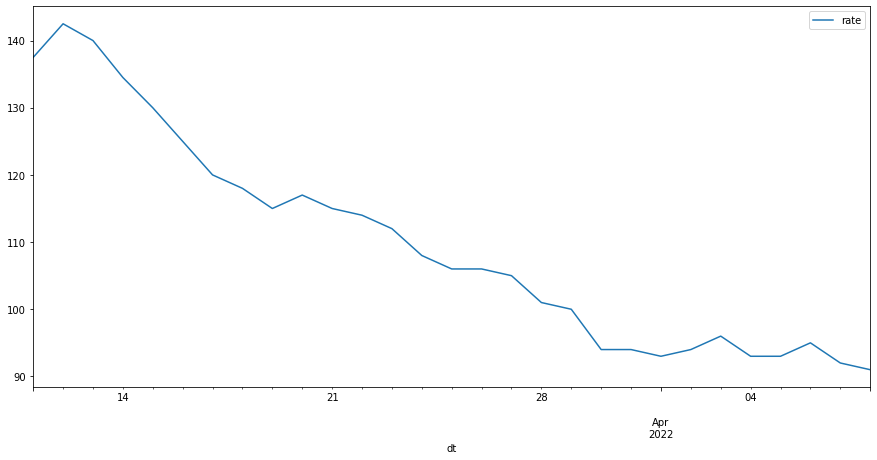

In [764]:

df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) 
            | (df_usd_extract['trans_type']==None))
    ][['dt','rate']]\
        .set_index('dt').resample('1d').quantile(q=0.5)\
        .plot(figsize=(15,7))

/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<AxesSubplot:xlabel='dt'>

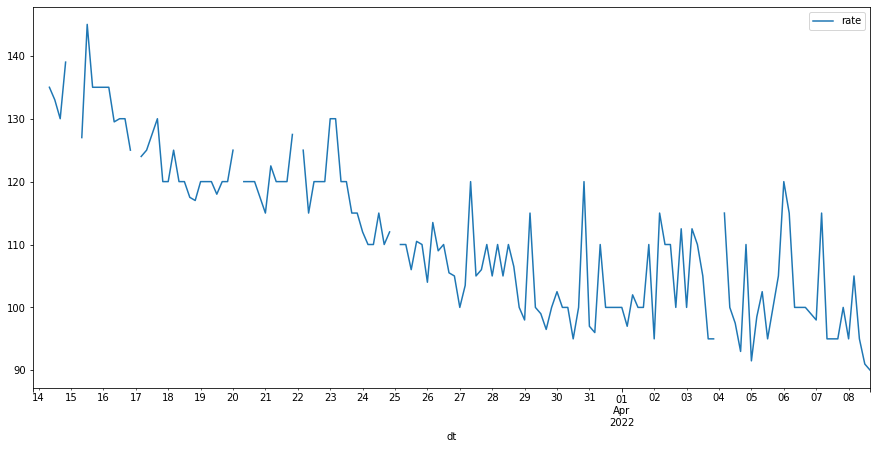

In [644]:
df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) 
            | (df_usd_extract['trans_type']==None))
    ][['dt','rate']]\
        .set_index('dt').resample('4h').quantile(q=0.5)\
        .plot(figsize=(15,7))

<AxesSubplot:xlabel='dt'>

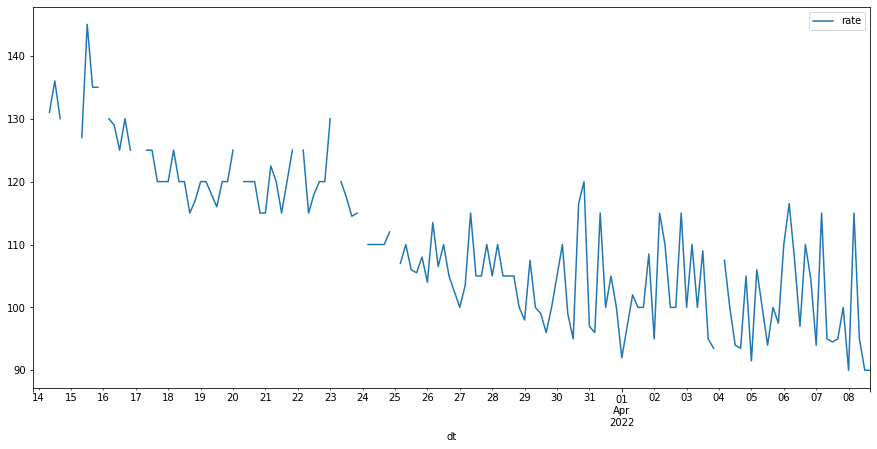

In [630]:
df_ask[['dt','rate']]\
        .set_index('dt').resample('4h').quantile(q=0.5)\
        .plot(figsize=(15,7))

<AxesSubplot:xlabel='dt'>

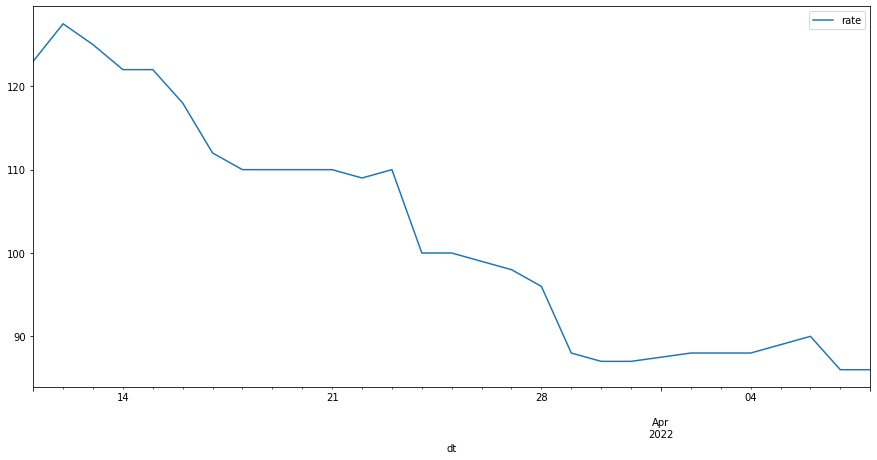

In [761]:
df_bid = df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(куп(им|лю)|кто(.*?)прод)',regex=True))
    ]
#df_bid.to_excel('fxcash_usd_bid.xlsx')
df_bid[(df_bid['rate']>50)&(df_bid['rate']<200)][['dt','rate']]\
        .set_index('dt').resample('1d').quantile(q=0.5)\
        .plot(figsize=(15,7))

<AxesSubplot:xlabel='dt'>

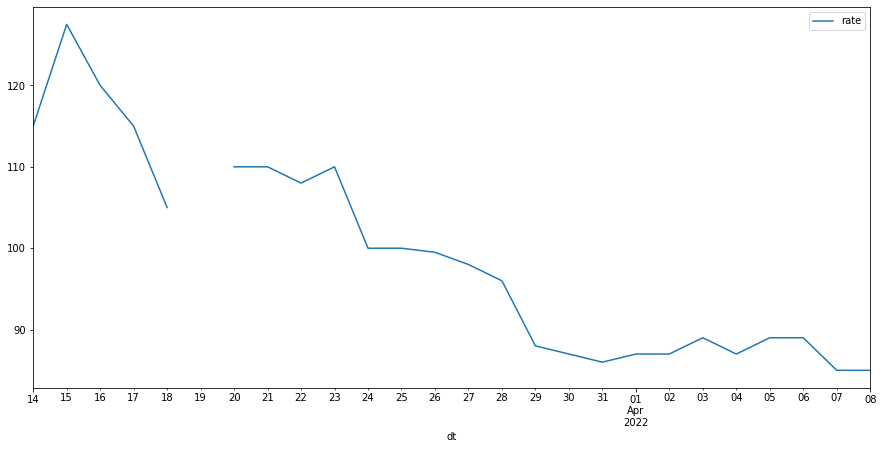

In [733]:
df_bid[(df_bid['rate']>50)&(df_bid['rate']<200)][['dt','rate']]\
        .set_index('dt').resample('1d').quantile(q=0.5)\
        .plot(figsize=(15,7))

In [763]:
df_ask = df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) 
            | (df_usd_extract['trans_type']==None))
    ]

/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df_ask = df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) 
            | (df_usd_extract['trans_type']==None))
    ]

In [ ]:
df_ask['len']=df    

In [41]:
df_ask.to_excel('fxcash_usd.xlsx')

In [730]:
df_bid = df_uasd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(куп(им|лю)|кто(.*?)прод)',regex=True))
    ]
#df_bid.to_excel('fxcash_usd_bid.xlsx')

/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df_ask = df_usd_extract[
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) 
            | (df_usd_extract['trans_type']==None))
    ]

In [39]:
df_ask['rate_true'] = df_ask.apply(lambda x: min(x['rate'],x['rate_list']) if len(x['value_list'])==1 else x['rate'])

KeyError: 'value_list'

In [40]:
df_ask.columns

Index(['dt', 'text', 'trans_type', 'currency', 'value_string', 'rate',
       'value_list', 'rate_list'],
      dtype='object')

In [35]:
df_ask

,dt,rate
36,2022-03-13 23:31:05,140.0
43,2022-03-14 09:09:01,NaN
46,2022-03-14 10:10:38,135.0
47,2022-03-14 10:55:03,100.0
50,2022-03-14 11:26:31,131.0
...,...,...
9807,2022-04-08 18:50:21,105.0
9808,2022-04-08 18:50:23,89.0
9811,2022-04-08 18:59:53,NaN
9813,2022-04-08 19:02:46,100.0


In [232]:
df_usd_extract[
    (df_usd_extract['rate']<200) &
    (df_usd_extract['rate']>75) &
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) | (df_usd_extract['trans_type']==None))
    ].tail(50)

/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,dt,text,trans_type,currency,value_string,rate,value_list,rate_list
8354,2022-04-06 13:28:36,"продам $, новые купюры, 93 р. от 1000$. москва.",продам,$,93 р,93.0,[93.0],93.0
8360,2022-04-06 13:31:38,продам новые $ по 97р,продам,$,по 97,97.0,[97.0],97.0
8362,2022-04-06 13:33:40,продам \n\n$ по 93\n\n\nказань,продам,$,по 93,93.0,[93.0],93.0
8363,2022-04-06 13:34:18,"красноярск, продам 💵 по 100₽. рассмотрю ваши п...",продам,💵,по 100,100.0,[100.0],100.0
8366,2022-04-06 13:34:36,"продам 100$ по 88, метро рязанский проспект",продам,$,по 88,88.0,"[100.0, 88.0]",88.0
8374,2022-04-06 13:39:40,"продам ровно 100$ по 88, метро рязанский проспект",продам,$,по 88,88.0,"[100.0, 88.0]",88.0
8379,2022-04-06 13:46:17,"отдам 100$ по курсу 87, москва, рязанский прос...",отдам,$,курсу 87,87.0,"[100.0, 87.0]",87.0
8380,2022-04-06 13:46:50,продам 500$ по 90 москва,продам,$,по 90,90.0,[90.0],90.0
8422,2022-04-06 14:40:42,продам 8000$ по по курсу 130₽,продам,$,курсу 130,130.0,[130.0],130.0
8424,2022-04-06 14:44:42,продам доллар новые кюпуры по 100$ по 120р за ...,продам,дол,по 100,100.0,"[100.0, 120.0]",100.0


/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<AxesSubplot:xlabel='dt'>

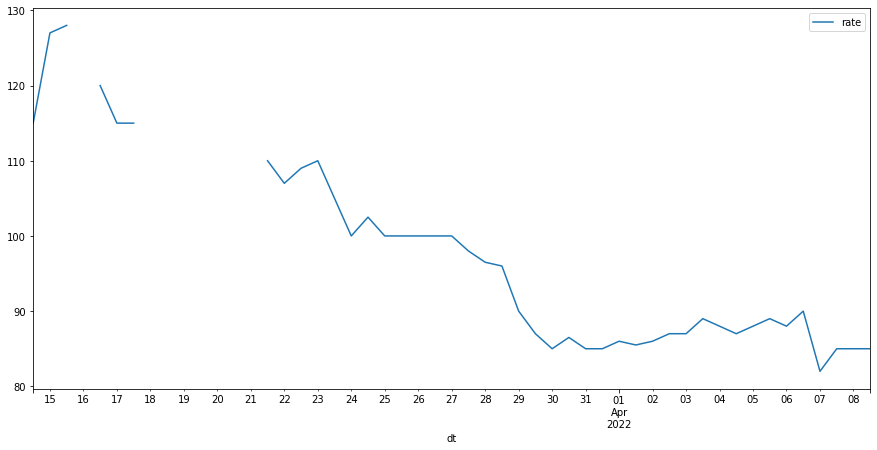

In [28]:
df_usd_extract[
    (df_usd_extract['rate']<200) &
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(куп(им|лю)|кто(.*?)прод)',regex=True))
    ][['dt','rate']].set_index('dt').resample('12h').median().plot(figsize=(15,7))

/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/data/ve-webcpi/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<AxesSubplot:xlabel='dt'>

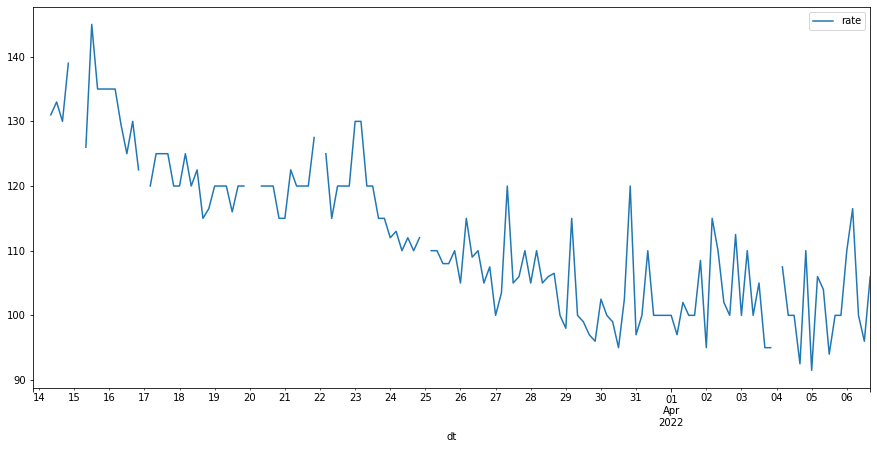

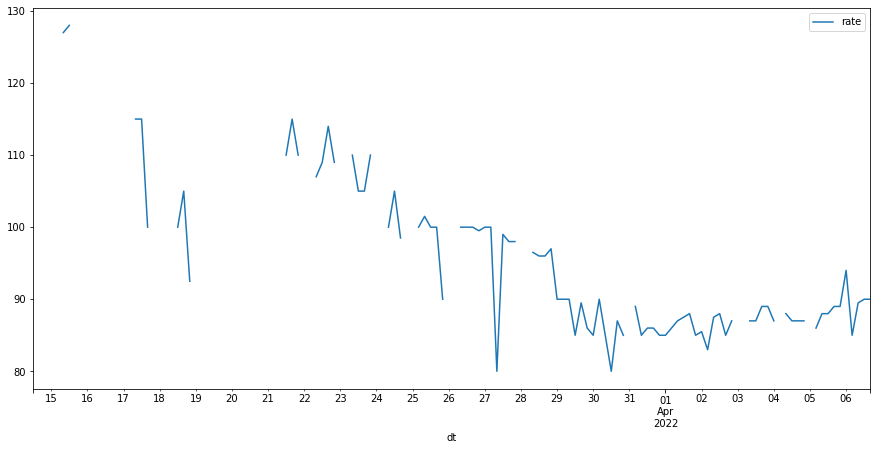

In [216]:
df_usd_extract[
    (df_usd_extract['rate']<200) &
    (df_usd_extract['currency']!=None)
    & (df_usd_extract['trans_type']\
        .str.contains(r'(п(р|)ода(жа|ю|м|дим)|отда(м|ю|дим))',regex=True) | (df_usd_extract['trans_type']==None))
    ][['dt','rate']].set_index('dt').resample('4h').median().plot(figsize=(15,7))

